In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**2.1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [48]:
""" 
den (denominator) - ряд чисел в знаменателе: [1, 2, 3, ..., 20]

Так как степень двойки в числителе равна числу в знаменателе, создаем массив из 20 двоек 
и возводим их в степень в соответствии со значением знаменателя из массива den

"""

den = np.arange(1,21,1)                          # Массив чисел в знаменателе и степеней двойки
vec = np.power((np.ones(20)*2), den) / den       # Возведение в степень и создание вектора

In [49]:
print(vec)

[2.00000000e+00 2.00000000e+00 2.66666667e+00 4.00000000e+00
 6.40000000e+00 1.06666667e+01 1.82857143e+01 3.20000000e+01
 5.68888889e+01 1.02400000e+02 1.86181818e+02 3.41333333e+02
 6.30153846e+02 1.17028571e+03 2.18453333e+03 4.09600000e+03
 7.71011765e+03 1.45635556e+04 2.75941053e+04 5.24288000e+04]


**2.2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [263]:
""" 
Воспользуемся np.dot() - на вход подаются два вектора, которые перемножаются 
по правилам матричного умножения (i-й элемент первого вектора умножается 
на i-ый элемент второго вектора, затем полученные числа суммируются), и 
получается число, являющееся искомой суммой ряда

"""

i = np.arange(0,6,1)
result = np.dot(0.1**(3*i), 0.2**(4*i))

In [264]:
print(result)

1.00000160000256


**2.3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [4]:
matrix = np.zeros((8,8))       # Создаем матрицу нулей размерности 8x8

matrix[1::2,::2] = 1           # Заполняем единицами каждую нечетную строку по четным столбцам
print(matrix)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]


In [5]:
matrix[::2,1::2] = 1           # Заполняем единицами каждый нечетный столбец по четным строкам
print(matrix)

[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]


**2.4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

$x=rcos\varphi$ \
$y=rsin\varphi$ 

$r=\sqrt{x^2+y^2}$ \
$\varphi=tg{\frac{y}{x}}$

In [6]:
X = np.random.random((5, 2))
print(X)

[[0.35891649 0.94657651]
 [0.58505579 0.19438385]
 [0.39012747 0.57613087]
 [0.47029623 0.02004176]
 [0.43833834 0.81477295]]


In [7]:
"""  
Транспонируем матрицу так, чтобы в первой строке были координаты всех точек по оси X, 
а во второй строке - координаты по оси Y    
"""
X0 = (X.T)[0]
X1 = (X.T)[1]
print(X0)
print(X1)

[0.35891649 0.58505579 0.39012747 0.47029623 0.43833834]
[0.94657651 0.19438385 0.57613087 0.02004176 0.81477295]


In [8]:
"""
Посчитаем соответствующие значения радиус-векторов и углов phi
"""
r_X = np.array([np.sqrt(X0**2+X1**2)])
phi_X = np.array([np.tan(X1/X0)])

In [9]:
r_X = r_X.T                                    # Преобразуем строки в векторы 
phi_X = phi_X.T

In [10]:
X_new = np.concatenate((r_X, phi_X), axis=1)   # Объединяем две матрицы
print(X_new)

[[ 1.01233795 -0.55186743]
 [ 0.61650252  0.345039  ]
 [ 0.6957918  10.60463695]
 [ 0.47072308  0.04264101]
 [ 0.92520023 -3.37593442]]


**2.5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [15]:
X = np.random.random((10,10))

In [16]:
print(X)    # Вывод матрицы

[[0.98956732 0.0446849  0.43256751 0.45088429 0.61241211 0.39806295
  0.25690356 0.92361003 0.31288826 0.53124246]
 [0.22256171 0.13199522 0.41118527 0.84534554 0.48091289 0.18627439
  0.62190464 0.0758235  0.57974447 0.60498929]
 [0.42698179 0.60380169 0.14307379 0.5533518  0.0105067  0.94358042
  0.90950092 0.90623918 0.46633605 0.18264423]
 [0.76123263 0.06021665 0.89472546 0.80192957 0.63170121 0.58451406
  0.09593751 0.03614602 0.86004311 0.4970224 ]
 [0.85229863 0.62001069 0.57455946 0.90880375 0.31181843 0.9135288
  0.94273715 0.24764677 0.27743964 0.49974467]
 [0.02638462 0.59922627 0.47740863 0.465358   0.14043933 0.7675191
  0.28152945 0.82123204 0.84760782 0.50050184]
 [0.01807578 0.55221226 0.13522744 0.08273015 0.19333138 0.50697752
  0.6183842  0.49090676 0.99024794 0.63333878]
 [0.01576735 0.16844168 0.1755697  0.89041648 0.53359208 0.30045784
  0.80301156 0.90871291 0.64830894 0.38323704]
 [0.55161101 0.92194269 0.38967177 0.32973481 0.64580272 0.71863647
  0.69413901 0

In [17]:
print(np.argmax(X))     # Вывод индекса максимального элемента

68


In [18]:
"""  
Номер строки будем находить как целую часть от деления индекса (argmax) на n (n=10),
а номер столбца как остаток от деления на n
"""

row, col = [np.argmax(X)//len(X), np.argmax(X)%len(X)]
print('X[{0}][{1}] = '.format(row,col), X[row][col])

X[6][8] =  0.9902479361047783


**2.6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

Расстояние между двумя точками определяется по формуле:
$|AB| = \sqrt{(x_A-x_B)^2+(y_A-y_B)^2}$

In [19]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))

In [20]:
print(X)
print(y)

[[0.71576746 0.60523358]
 [0.74403705 0.03683217]
 [0.13650312 0.27277139]
 [0.54702381 0.79400036]
 [0.22837329 0.41636974]
 [0.35976318 0.81635112]
 [0.67387345 0.10861282]
 [0.31565936 0.42049834]
 [0.45853442 0.00558742]
 [0.10125564 0.10747219]]
[[0.41969763 0.5984674 ]]


In [21]:
"""  
Транспонируем матрицу так, чтобы в первой строке были координаты всех точек по оси X, 
а во второй строке - координаты по оси Y    
"""
X0 = (X.T)[0]
X1 = (X.T)[1]

print(X0)
print(X1)

[0.71576746 0.74403705 0.13650312 0.54702381 0.22837329 0.35976318
 0.67387345 0.31565936 0.45853442 0.10125564]
[0.60523358 0.03683217 0.27277139 0.79400036 0.41636974 0.81635112
 0.10861282 0.42049834 0.00558742 0.10747219]


In [22]:
"""
Посчитаем квадраты разницы между координатами каждой точки массива X и точки y по осям
"""
X_dif = (X0 - y[0][0])**2
Y_dif = (X1 - y[0][1])**2

print(X_dif)
print(Y_dif)

[0.08765735 0.10519606 0.08019913 0.01621196 0.036605   0.00359214
 0.06460535 0.01082396 0.0015083  0.1014053 ]
[4.57811665e-05 3.15434133e-01 1.06077890e-01 3.82331380e-02
 3.31595570e-02 4.74733132e-02 2.39957512e-01 3.16729872e-02
 3.51506667e-01 2.41076300e-01]


In [23]:
comp = np.sqrt(X_dif+Y_dif)  # Массив расстояний каждой точки из X от точки y
print(comp)

[0.29614714 0.64856009 0.43159822 0.23333473 0.26412982 0.22597666
 0.55187214 0.20614788 0.59415062 0.58521928]


In [24]:
indx = np.argmin(comp)      # Минимальное значение из массива расстояний будет соответствовать ближайшей точке к y
print(X[indx])

[0.31565936 0.42049834]


**2.7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

In [25]:
"""
Определим три вектора интервалов, проведем над ними необходимые операции и затем объединим

"""
k = 0.005                               # Длина шага
X0 = np.arange(-3, 0, k) 
X1 = np.arange(0, 2, k) 
X2 = np.arange(2, 3+k, k) 

X = np.concatenate((X0,X1,X2))

In [26]:
X0 = X0**2+2*X0+6
X1 = X1 + 6
X2 = X2**2+4*X2-4

In [27]:
F = np.concatenate((X0,X1,X2))          # Вектор значений функции

In [28]:
print(F)

[ 9.        8.980025  8.9601   ... 16.9001   16.950025 17.      ]


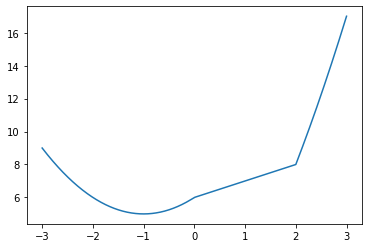

In [29]:
plt.plot(X,F)

**2.8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [51]:
X = np.random.random((10, 10))
print(X)

[[0.93239864 0.87593796 0.5110714  0.5827544  0.93625087 0.95137293
  0.71486799 0.56954745 0.76070254 0.26897882]
 [0.15864472 0.6479806  0.53898444 0.65796457 0.35229241 0.24549597
  0.15562134 0.73887165 0.43879847 0.29238887]
 [0.14776678 0.22157147 0.4988883  0.56060844 0.08656998 0.78421416
  0.48271696 0.65356872 0.91698141 0.89742305]
 [0.90947313 0.3358258  0.50342678 0.75472463 0.59186602 0.1151433
  0.56778944 0.81029745 0.16856524 0.69498835]
 [0.34580313 0.17725413 0.99989243 0.91489292 0.59877938 0.78317254
  0.4696939  0.3397918  0.18630694 0.14246712]
 [0.9923924  0.03835941 0.48340558 0.21185911 0.59978784 0.44430965
  0.9274486  0.87539406 0.85018147 0.86524961]
 [0.89257154 0.23856791 0.37211415 0.98833265 0.73902527 0.01822683
  0.81162749 0.16459744 0.80603768 0.92139095]
 [0.72287266 0.67731025 0.24381748 0.22695902 0.73004802 0.42893626
  0.99363129 0.91098693 0.08152516 0.85637077]
 [0.90442365 0.66637758 0.85113869 0.63321069 0.64352293 0.70959166
  0.33079803 

In [52]:
means = np.array([np.mean(X, axis=1)])    # Массив средних значений по строкам
X -= means.T                              # Вычитание среднего значения строки из каждого элемента соответствующей строки

In [54]:
print(means)

[[0.7103883  0.4227043  0.52503093 0.54521001 0.49580543 0.62883877
  0.59524919 0.58724578 0.55826589 0.52689813]]


In [53]:
print(X)

[[ 0.22201034  0.16554966 -0.1993169  -0.1276339   0.22586257  0.24098463
   0.00447969 -0.14084084  0.05031424 -0.44140948]
 [-0.26405959  0.2252763   0.11628014  0.23526026 -0.07041189 -0.17720834
  -0.26708296  0.31616734  0.01609417 -0.13031543]
 [-0.37726415 -0.30345946 -0.02614263  0.03557751 -0.43846095  0.25918324
  -0.04231397  0.12853779  0.39195049  0.37239213]
 [ 0.36426312 -0.20938421 -0.04178324  0.20951461  0.046656   -0.43006672
   0.02257942  0.26508744 -0.37664477  0.14977834]
 [-0.1500023  -0.3185513   0.504087    0.41908749  0.10297395  0.28736711
  -0.02611153 -0.15601363 -0.30949849 -0.35333831]
 [ 0.36355363 -0.59047936 -0.14543319 -0.41697967 -0.02905093 -0.18452912
   0.29860983  0.24655528  0.2213427   0.23641083]
 [ 0.29732235 -0.35668128 -0.22313504  0.39308346  0.14377608 -0.57702236
   0.2163783  -0.43065176  0.21078849  0.32614176]
 [ 0.13562688  0.09006447 -0.3434283  -0.36028676  0.14280224 -0.15830953
   0.4063855   0.32374114 -0.50572063  0.26912499]


In [32]:
# Проверим средние значения по строкам 
for i in range(len(X)):
    print(abs(round(np.mean(X[i]))))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


**2.9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [33]:
X = np.random.normal(loc=5, scale=2., size=1000)

In [ ]:
"""
Как видно, полученные значения соотносятся с параметрами, заданными в определении массива, а именно:
    loc = 5    <->  E примерно равно 5
    scale = 2  <->  sqrt(D) примерно равен 2   
"""

In [35]:
E = np.mean(X)
print(E)

4.995569123373938


In [36]:
D = np.std(X, ddof=1)**2
print(D)

3.9008832886581084


**2.10.** Создать матрицу (NB. БЕЗ ЦИКЛОВ И ИЗМЕНЕНИЯ ОТДЕЛЬНЫХ ЭЛЕМЕНТОВ):

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [37]:
"""
Для того, чтобы получить заданную матрицу, создадим 
вектор-столбец и вектор-строку чисел от 0 до 4, затем
сложим эти векторы и возьмем остаток от деления получившихся чисел на 5

"""
row = np.array([[0,1,2,3,4]])
vec = row.T

matrix = (row + vec) % 5
print(matrix)

[[0 1 2 3 4]
 [1 2 3 4 0]
 [2 3 4 0 1]
 [3 4 0 1 2]
 [4 0 1 2 3]]


**2.11.** Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [38]:
import time

In [39]:
def sample(x, c):
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1   
        res.append(idx)
    return res

In [40]:
sample([50, 3, 1, 7, 20], 5)  

[4, 0, 0, 4, 0]

Реализуйте данный алгоритм более оптимальным способом, без использования циклов.

In [41]:
def sample1(x, c):
    assert len(x) > 0

    s = np.sum(x)
    
    Val = s*np.random.random((1,c))          # Вектор рандомных значений
    print('vals: ', Val[0])

    m = np.tri(len(x)).T                     # Определим верхнетреугольную матрицу единиц 
    
    r = np.dot(x,m)                          # Для того, чтобы создать вектор сумм по элементам, 
    print('sums: ', r)                       # умножим исходный вектор x на матрицу m
    
    k = r - Val.T                            # Получим вектор разницы значений сумм и рандомных значений val
    
    k[k < 0] = 1e18                          # Заменим все отрицательные элементы на очень большое число 
    k = k * (-1)                             # Умножим матрицу на -1
     
    res = np.argmax(k, axis=1)               # Найдем индексы максимальных значений по строкам
                                             # (то есть в нашем случае - минимальных по модулю отрицательных чисел)
                                             # Индексы этих значений и будут искомыми индексами,
                                             # так как они указывают на индекс первого вхождения положительного числа
                                             # в строку рассматриваемой нами матрицы (отражающую разницу в значениях 
                                             # сумм и val)

    return res

In [42]:
sample1([50, 3, 1, 7, 20], 5)  

vals:  [15.88874006 21.27474044 73.48381797 16.72765559  0.80420744]
sums:  [50. 53. 54. 61. 81.]


array([0, 0, 4, 0, 0], dtype=int64)